In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,UUID,Major,Minor,RSSI,X,Y,Timestamp,SessId
0,b9407f30f5f8466eaff925556b57fe6d,1,9619,-57,13.370117,1.610936,1494769516767,32
1,b9407f30f5f8466eaff925556b57fe6d,1,9619,-59,13.197756,1.610689,1494769516978,32
2,b9407f30f5f8466eaff925556b57fe6d,1,9619,-57,13.032746,1.610453,1494769517180,32
3,b9407f30f5f8466eaff925556b57fe6d,1,9617,-82,12.957593,1.610346,1494769517272,32
4,b9407f30f5f8466eaff925556b57fe6d,1,9616,-79,12.889792,1.610249,1494769517355,32


In [4]:
df = df[df.UUID == 'b9407f30f5f8466eaff925556b57fe6d']

In [84]:
sess = df[df.SessId == 31]

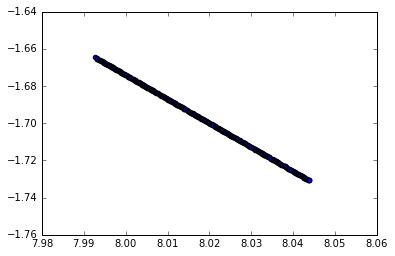

In [85]:
plt.scatter(sess.X, -sess.Y)

In [86]:
def plot_rssi_data(df, figsize=(15, 10), smooth_func=lambda x: x):
    min_time = df.Timestamp.min()
    unique_minors = df.Minor.unique()
    fig = plt.figure(figsize=figsize)
    for i, minor in enumerate(unique_minors):
        bd = smooth_func(df[df.Minor == minor])
        ax = plt.subplot(int(np.ceil(len(unique_minors) / 3)), 3, 1 + i)
        ax.set_title(str(minor))
        plt.plot(bd.Timestamp-min_time, bd.RSSI)

In [87]:
def plot_rssi_map(df, figsize=(15, 10), smooth_func=lambda x: x):
    min_time = df.Timestamp.min()
    unique_minors = df.Minor.unique()
    fig = plt.figure(figsize=figsize)
    for i, minor in enumerate(unique_minors):
        bd = smooth_func(df[df.Minor == minor])
        ax = plt.subplot(int(np.ceil(len(unique_minors) / 3)), 3, 1 + i)
        ax.set_title(str(minor))
        plt.scatter(bd.X, -bd.Y, c=-bd.RSSI, cmap='Greys')


In [88]:
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.signal import medfilt

In [89]:
def rssi_lowess_smooth(df):
    smoothed = lowess(df.RSSI, df.Timestamp)
    new_df = df.copy()
    new_df.RSSI = smoothed[:, 1]
    new_df.Timestamp = smoothed[:, 0]
    return new_df

In [90]:
def create_rssi_median_filter(kernel=9):
    def median_filter(df):
        smoothed = medfilt(df.RSSI, kernel)
        new_df = df.copy()
        new_df.RSSI = smoothed
        return new_df
    return median_filter

In [103]:
def plot_session(df):
    plt.title("Route")
    plt.scatter(df.X, -df.Y)
    plot_rssi_data(sess, smooth_func=create_rssi_median_filter(21))
    plot_rssi_map(sess, smooth_func=create_rssi_median_filter(21))

In [104]:
def filter_session(sess_df, ):
    result = pd.DataFrame()
    for minor in sess_df.Minor.unique():
        result = result.append(rssi_lowess_smooth(sess_df[sess_df.Minor == minor]))
    return result

In [105]:
def filter_rssi_df(df):
    result = pd.DataFrame()
    for sess_id in df.SessId.unique():
        result = result.append(filter_session(df[df.SessId == sess_id]))
    return result

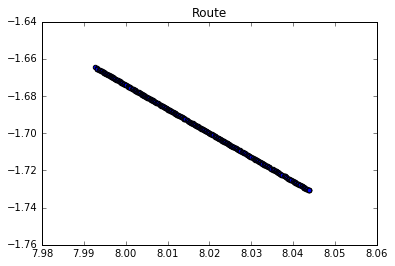

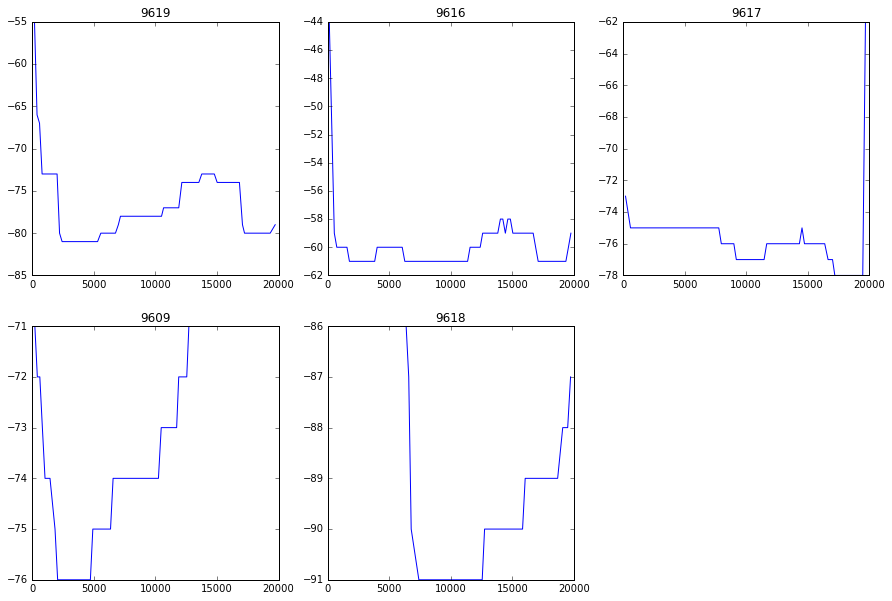

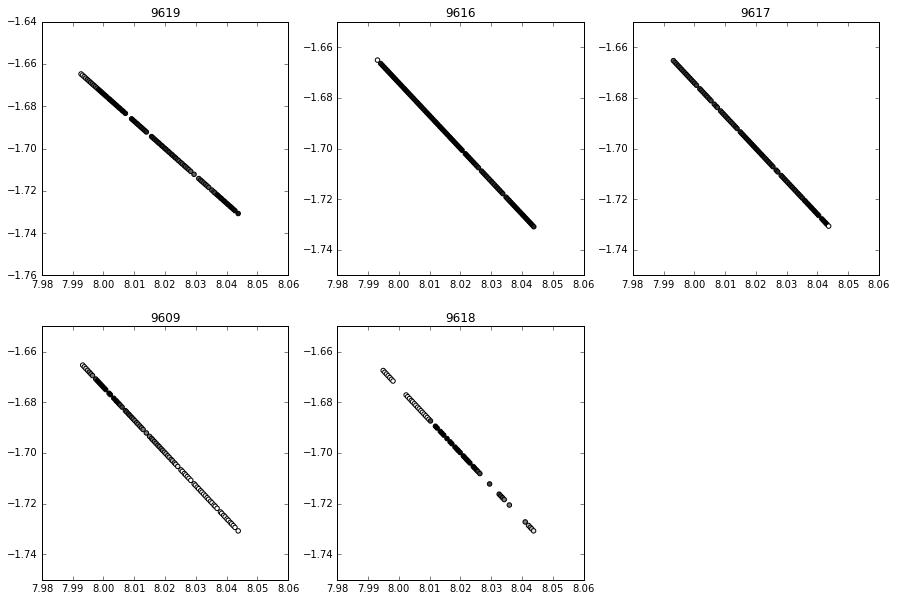

In [106]:
plot_session(sess)

In [16]:
filtered_df = filter_rssi_df(df[df.SessId != 32])

In [17]:
filtered_df.head()

,UUID,Major,Minor,RSSI,X,Y,Timestamp,SessId
467,b9407f30f5f8466eaff925556b57fe6d,1,9609,-83.005220,3.392175,1.492006,1.494768e+12,22
474,b9407f30f5f8466eaff925556b57fe6d,1,9609,-82.931248,3.073262,1.494711,1.494768e+12,22
481,b9407f30f5f8466eaff925556b57fe6d,1,9609,-82.863032,2.755896,1.497402,1.494768e+12,22
485,b9407f30f5f8466eaff925556b57fe6d,1,9609,-82.831141,2.595665,1.498761,1.494768e+12,22
489,b9407f30f5f8466eaff925556b57fe6d,1,9609,-82.802172,2.440853,1.500074,1.494768e+12,22


In [18]:
#route_1_rssi = pd.read_csv('long_route_1_rssi.txt')
#route_1_pos = pd.read_csv('long_route_1_position.txt')

In [19]:
df.SessId.unique()

array([32, 22, 23, 24, 25, 26, 27, 28, 29, 30, 16, 17, 18, 21, 20, 19, 31], dtype=int64)

In [20]:
route_1_rssi = df[df.SessId == 32]

In [21]:
route_1_pos = df[df.SessId == 32]

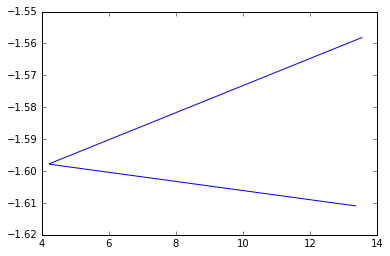

In [22]:
plt.plot(route_1_pos.X, -route_1_pos.Y)

In [23]:
filt_r_1 = filter_session(route_1_rssi)

In [24]:
filt_r_1.head()

,UUID,Major,Minor,RSSI,X,Y,Timestamp,SessId
0,b9407f30f5f8466eaff925556b57fe6d,1,9619,-66.770271,13.370117,1.610936,1.494770e+12,32
1,b9407f30f5f8466eaff925556b57fe6d,1,9619,-67.274045,13.197756,1.610689,1.494770e+12,32
2,b9407f30f5f8466eaff925556b57fe6d,1,9619,-67.750146,13.032746,1.610453,1.494770e+12,32
5,b9407f30f5f8466eaff925556b57fe6d,1,9619,-68.224630,12.866102,1.610215,1.494770e+12,32
9,b9407f30f5f8466eaff925556b57fe6d,1,9619,-68.697220,12.697825,1.609975,1.494770e+12,32


In [25]:
from collections import defaultdict

In [26]:
class Bin:
    def __init__(self):
        self.x_values = []
        self.y_values = []
        self.rssi_values = defaultdict(list)
    
    def append_x(self, x):
        self.x_values.append(x)
    
    def append_y(self, y):
        self.y_values.append(y)
        
    def append_rssi(self, minor, rssi):
        self.rssi_values[minor].append(rssi)
    
    def calc_x(self):
        return np.mean(self.x_values)
    
    def calc_y(self):
        return np.mean(self.y_values)
    
    def calc_rssi(self):
        result = {}
        for k, v in self.rssi_values.items():
            result[k] = np.mean(v)
        return result
    
    def __str__(self):
        return "X: {}\nY: {}\nRSSI: {}".format(self.x_values, self.y_values, self.rssi_values)
        

In [27]:
def build_session_bins(sess_df, n_bins=100):
    sess_df = sess_df.copy()
    sess_df.Timestamp -= sess_df.Timestamp.min()
    bin_w = (sess_df.Timestamp.max()) / float(n_bins-1)
    result = [Bin() for _ in range(n_bins)]
    for _, row in sess_df.iterrows():
        i = int(row.Timestamp // bin_w)
        if 'X' in row and 'Y' in row:
            result[i].append_x(row.X)
            result[i].append_y(row.Y)
        result[i].append_rssi(row.Minor, row.RSSI)
    return result

In [28]:
def build_bins(rssi_df, bins_per_sess=100):
    bins = []
    for s in rssi_df.SessId.unique():
        bins += build_session_bins(rssi_df[rssi_df.SessId == s], bins_per_sess)
    return bins

In [29]:
train_bins = build_bins(filtered_df)

In [30]:
test_bins = build_session_bins(filt_r_1)

In [31]:
def eucledian_dist(bin1, bin2):
    r1 = bin1.calc_rssi()
    r2 = bin2.calc_rssi()
    keys = r1.keys() | r2.keys()
    dist = 0
    for k in keys:
        if not k in r1:
            r1[k] = -90
        if not k in r2:
            r2[k] = -90
        dist += (r1[k] - r2[k]) ** 2
    return np.sqrt(dist)

In [32]:
def find_closest(current, bin_list):
    closest = eucledian_dist(current, bin_list[0])
    closest_dist = 1000000000000
    for i in range(len(bin_list)):
        dist = eucledian_dist(current, bin_list[i])
        if dist < closest_dist:
            closest_dist = dist
            closest = i
    return bin_list[closest]

In [52]:
x = []
y = []
for b in test_bins:
    pos = find_closest(b, train_bins)
    x.append(pos.calc_x())
    y.append(pos.calc_y())

C:\Data\Soft\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


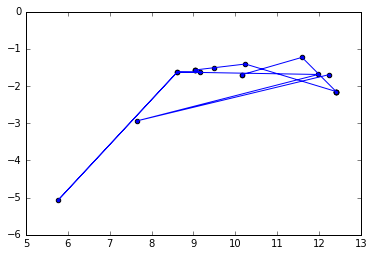

In [59]:
plt.plot(x[:20], -np.array(y[:20]))
plt.scatter(x[:20], -np.array(y[:20]))

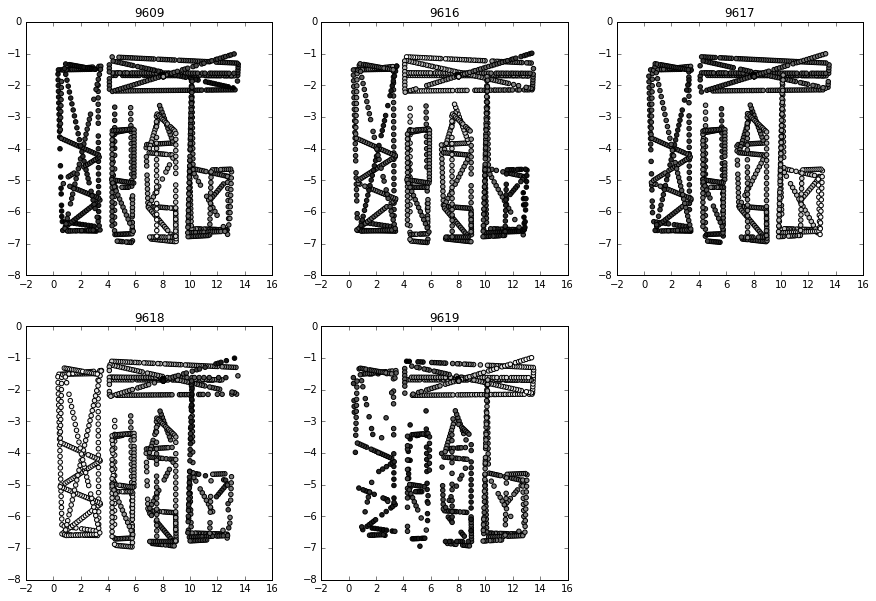

In [35]:
plot_rssi_map(filtered_df)

In [36]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.base import clone

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
def build_regression_map(rssi_df, regressor, preprocessor=None, figsize=(15, 10)):
    result = np.array([])
    unique_minors = sorted(rssi_df.Minor.unique())
    fig = plt.figure(figsize=figsize)
    for i, minor in enumerate(unique_minors):
        minor_df = rssi_df[rssi_df.Minor == minor]
        train_in = minor_df[['X','Y']].as_matrix()
        train_out = -minor_df[['RSSI']].as_matrix().ravel()
        if preprocessor:
            train_in = preprocessor.fit_transform(train_in)
        reg = clone(regressor)
        reg.fit(train_in, train_out)
        xy = np.mgrid[0:14:1, 0:-8:-1].reshape(2,-1).T
        test_in = np.mgrid[0:14:1, 0:-8:-1].reshape(2,-1).T
        if preprocessor:
            test_in = preprocessor.fit_transform(test_in)
        pred = reg.predict(test_in)
        if len(result) == 0:
            result = pred.reshape(-1, 1)
        else:
            result = np.hstack((result, pred.reshape(-1, 1)))
        ax = plt.subplot(int(np.ceil(len(unique_minors) / 3)), 3, 1 + i)
        ax.set_title(str(minor))
        plt.scatter(xy[:, 0], xy[:, 1], c=pred, cmap='Greys')

    return (result, xy)


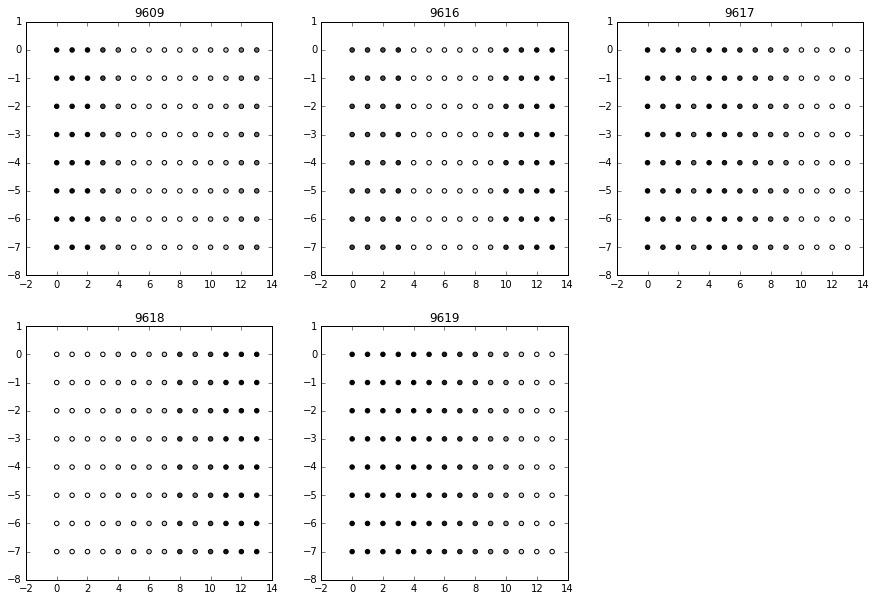

In [39]:
_ = build_regression_map(filtered_df, RandomForestRegressor(n_estimators=100, max_depth=15))

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

(array([[ 82.03871898,  62.48217858,  85.78442616,  65.81401496,
          83.63890011],
        [ 82.58494023,  60.91218066,  87.0075954 ,  65.92612112,
          81.47089899],
        [ 83.13116148,  59.34218274,  88.23076464,  66.03822729,
          79.30289786],
        [ 83.67738273,  57.77218481,  89.45393389,  66.15033346,
          77.13489674],
        [ 84.22360398,  56.20218689,  90.67710313,  66.26243962,
          74.96689561],
        [ 84.76982523,  54.63218897,  91.90027237,  66.37454579,
          72.79889448],
        [ 85.31604648,  53.06219105,  93.12344161,  66.48665195,
          70.63089336],
        [ 85.86226773,  51.49219313,  94.34661085,  66.59875812,
          68.46289223],
        [ 81.63657326,  62.52148047,  84.67245438,  67.47629715,  82.4269543 ],
        [ 82.18279451,  60.95148255,  85.89562362,  67.58840332,
          80.25895317],
        [ 82.72901576,  59.38148463,  87.11879286,  67.70050949,
          78.09095205],
        [ 83.27523701,  57.811

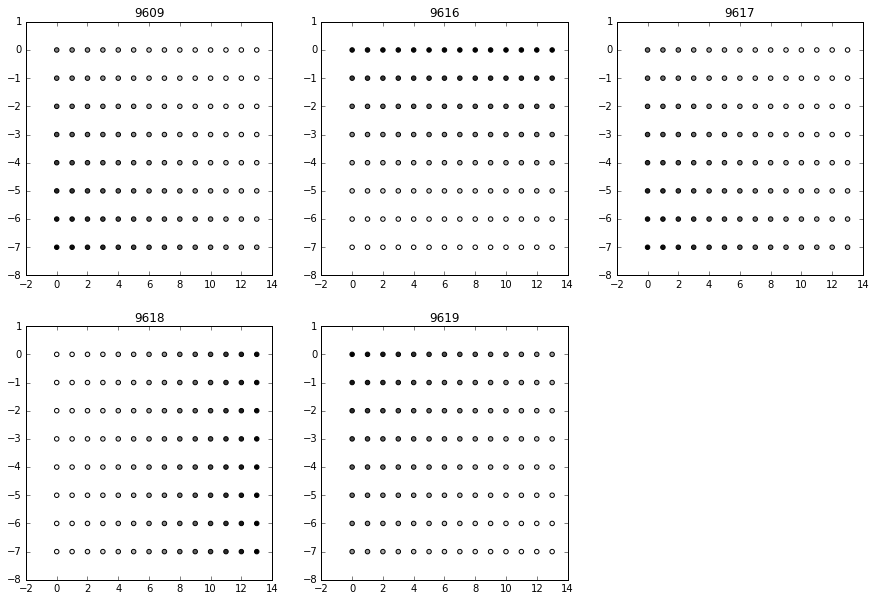

In [41]:
build_regression_map(filtered_df, LinearRegression())

In [42]:
from sklearn.neighbors import KNeighborsRegressor

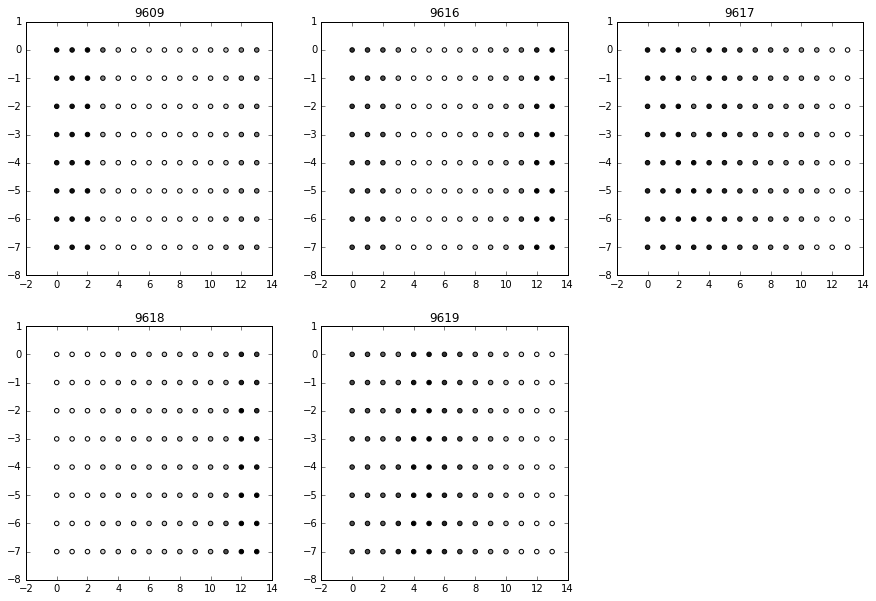

In [43]:
m, xy = build_regression_map(filtered_df, KNeighborsRegressor(weights='distance'))

In [44]:
x = []
y = []

for b in test_bins:    
    rssi = sorted(b.calc_rssi().items(), key=lambda x: x[0])
    rssi = np.array([x[1] for x in rssi])
    min_dist = 10000000
    min_i = -1
    if len(rssi) == 5:
        for i, rssi2 in enumerate(m):
            dist = np.linalg.norm(rssi - rssi2)
            if dist < min_dist:
                min_i = i
                dist = min_dist
        x.append(xy[min_i, 0])
        y.append(xy[min_i, 1])

In [45]:
m

array([[ 82.49969318,  73.33655842,  78.49936178,  65.60742819,
         86.16517857],
       [ 82.38632204,  72.92575481,  78.49297589,  66.03666512,
         85.94912084],
       [ 82.32351533,  72.92208108,  78.28357742,  66.46950548,
         85.33480221],
       [ 82.32323167,  72.50557561,  78.28388121,  66.47035839,
         85.33259705],
       [ 82.27832037,  72.50484896,  78.10436896,  66.88466335,
         85.33142761],
       [ 82.27836176,  72.08410848,  78.10480339,  66.88454793,
         85.33073517],
       [ 82.25099306,  72.0837128 ,  78.1050735 ,  66.88447268,
         85.33029126],
       [ 82.2510828 ,  72.08344571,  78.10525153,  66.88442068,
         85.32998922],
       [ 82.25210569,  72.08478106,  78.10543513,  66.88508576,
         85.33058615],
       [ 82.35297108,  72.08338188,  78.24863914,  66.88462548,
         85.32978912],
       [ 82.35385925,  72.08298038,  78.24988564,  66.88447134,  85.3294788 ],
       [ 82.35425954,  72.08280677,  78.25046529,  

In [46]:
class Locator:
    
    '''
    training_data - list of filtered data points ((x, y) {rssi_values...})
    '''
    def __init__(self, training_data, window_size=30):
        self.training_data = training_data
        self.current_window = []
        self.window_size = window_size
    
    def push_data(self, beacon_minor, rssi_value):
        self.current_window.append((beacon_minor, rssi_value))
        if len(self.current_window) > self.window_size:
            self.current_window = self.current_window[1:self.window_size + 1]
    
    def get_location(self):
        pass   

In [47]:
xy

array([[ 0,  0],
       [ 0, -1],
       [ 0, -2],
       [ 0, -3],
       [ 0, -4],
       [ 0, -5],
       [ 0, -6],
       [ 0, -7],
       [ 1,  0],
       [ 1, -1],
       [ 1, -2],
       [ 1, -3],
       [ 1, -4],
       [ 1, -5],
       [ 1, -6],
       [ 1, -7],
       [ 2,  0],
       [ 2, -1],
       [ 2, -2],
       [ 2, -3],
       [ 2, -4],
       [ 2, -5],
       [ 2, -6],
       [ 2, -7],
       [ 3,  0],
       [ 3, -1],
       [ 3, -2],
       [ 3, -3],
       [ 3, -4],
       [ 3, -5],
       [ 3, -6],
       [ 3, -7],
       [ 4,  0],
       [ 4, -1],
       [ 4, -2],
       [ 4, -3],
       [ 4, -4],
       [ 4, -5],
       [ 4, -6],
       [ 4, -7],
       [ 5,  0],
       [ 5, -1],
       [ 5, -2],
       [ 5, -3],
       [ 5, -4],
       [ 5, -5],
       [ 5, -6],
       [ 5, -7],
       [ 6,  0],
       [ 6, -1],
       [ 6, -2],
       [ 6, -3],
       [ 6, -4],
       [ 6, -5],
       [ 6, -6],
       [ 6, -7],
       [ 7,  0],
       [ 7, -1],
       [ 7, -2